/tmp/ipykernel_2343167/3334556359.py:25: FutureWarning: Please use atoms.calc = calc
  converted_atoms.set_calculator(SinglePointCalculator(converted_atoms, energy=energy, forces=forces))


Converted 1593 structures.
Energy: -30020.753736393934 eV
Forces:
[-2.16681278  1.94828956  0.16195329] eV/Angstrom


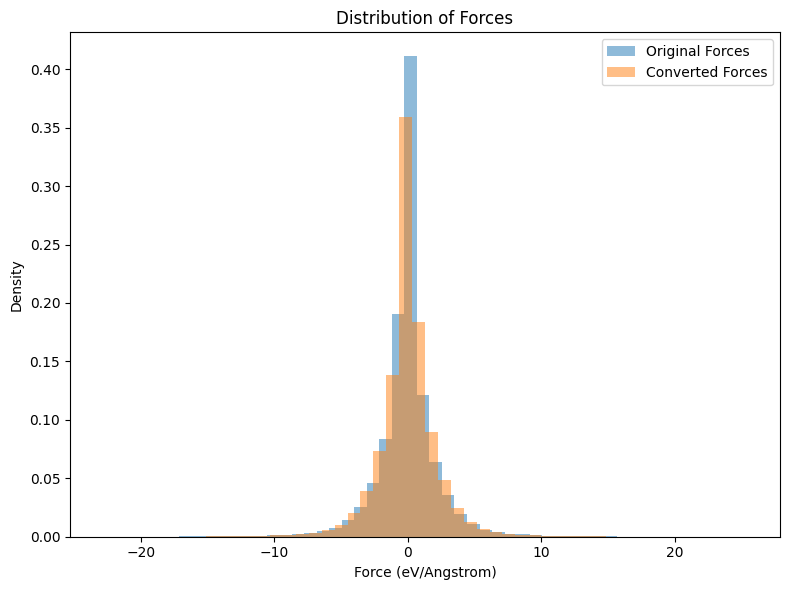

In [2]:
from ase import Atoms
from ase.io import read, write
from ase.calculators.singlepoint import SinglePointCalculator
from ase.units import Hartree, Bohr, eV, Angstrom
import matplotlib.pyplot as plt
import numpy as np

energy_to_eV = Hartree / eV
forces_to_eV_per_Angstrom = Hartree / (Bohr * eV / Angstrom)
length_to_A = Bohr / Angstrom

atoms_list: list[Atoms] = read("./data/h2o_1593_all.xyz", index=":")
converted_list = []
for atoms in atoms_list:
    energy = atoms.info["TotEnergy"] * energy_to_eV
    forces = atoms.arrays["force"] * forces_to_eV_per_Angstrom
    cell = np.array(atoms.get_cell(complete=True))
    cell *= length_to_A
    converted_atoms = Atoms(
        symbols=atoms.get_chemical_symbols(),
        scaled_positions=atoms.get_scaled_positions(),
        cell=cell,
        pbc=atoms.get_pbc(),
    )
    converted_atoms.set_calculator(SinglePointCalculator(converted_atoms, energy=energy, forces=forces))
    converted_list.append(converted_atoms)
print(f"Converted {len(converted_list)} structures.")
atoms = converted_list[0]
print(f"Energy: {atoms.get_potential_energy()} eV")
print(f"Forces:\n{atoms.get_forces()[0]} eV/Angstrom")

write("./data/h2o_1593_all.xyz", converted_list)

atoms_list = read("/home/lkong88/MatterTune/examples/water-thermodynamics/data/water_1000_eVAng.xyz", index=":")
forces_1 = [atoms.get_forces() for atoms in atoms_list]
forces_2 = [atoms.get_forces() for atoms in converted_list]
forces_1 =  np.vstack(forces_1)
forces_2 =  np.vstack(forces_2)

plt.figure(figsize=(8, 6))
plt.hist(forces_1.flatten(), bins=50, alpha=0.5, label="Original Forces", density=True)
plt.hist(forces_2.flatten(), bins=50, alpha=0.5, label="Converted Forces", density=True)
plt.xlabel("Force (eV/Angstrom)")
plt.ylabel("Density")
plt.title("Distribution of Forces")
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
from ase import Atoms
from ase.io import read, write
import numpy as np

atoms_list: list[Atoms] = read("./data/h2o_1593_all.xyz", index=":")
indices = np.random.choice(len(atoms_list), size=30, replace=False)
indices_train = indices[:25]
indices_val = indices[25:]
train_atoms = [atoms_list[i] for i in indices_train]
val_atoms = [atoms_list[i] for i in indices_val]
test_atoms = [atoms_list[i] for i in range(len(atoms_list)) if i not in indices]
write(f"./data/h2o_1593_train_{len(train_atoms)}.xyz", train_atoms)
write(f"./data/h2o_1593_val_{len(val_atoms)}.xyz", val_atoms)
write(f"./data/h2o_1593_test_{len(test_atoms)}.xyz", test_atoms)

In [4]:
from ase import Atoms
from ase.io import read, write
import numpy as np


atoms_list = read("./data/h2o_1593_train_25.xyz", index=":")
atoms_list += read("./data/h2o_1593_val_5.xyz", index=":")
write("./data/h2o_1593_30.xyz", atoms_list)

In [1]:
from ase import Atoms
from ase.io import read, write
import numpy as np


atoms_list = read("./data/h2o_1593_train_25.xyz", index=":")
indices = np.random.choice(len(atoms_list), size=4, replace=False)
write("./data/md_0.xyz", atoms_list[indices[0]])
write("./data/md_1.xyz", atoms_list[indices[1]])
write("./data/md_2.xyz", atoms_list[indices[2]])
write("./data/md_3.xyz", atoms_list[indices[3]])